# Assignment 2
## Generalized linear models and interactions

In this assignment we will investigate data from the psychophysics experiment of memory merging but in its discrete response variant. The data is in the folder *Experiment1* within the folder *Psychophysics*. In brief, participants were faced again with circular arrays of stimuli (in this experiment there could be 3 or 4 colored dots) while fixating. Following the delay period (in this experiment delays were variable and could be 0.1, 1 or 3 seconds) a colored probe stimulus appeared slightly displaced relative to the color-matching cue stimulus, and participants had to indicate with a button press whether this displacement was in the clockwise (CW, response 1) or anticlockwise (CCW, response 0) direction. Data from 8 different participants were acquired.

So, the important differences with the previous design are:
 - responses are not continuous (an angular location taking arbitrary values from -$\pi$ to $\pi$) but categorical (CW or CCW, with just two possible discrete responses)
 - apart from CW/CCW trials as in our previous assignment, there are now other factors of interest in our design (memory load: 3 or 4 items, and delay duration: 0.1, 1 or 3 s)

We will capitalize on these differences in this assignment to learn two important concepts and associated methods:
 - generalized linear models (to deal with binary/categorical response experiments)
 - interactions (to deal with multiple factors of interest and identify an interaction of interest design)




In [1]:
#we first load pachages that we will need
import numpy as np
import matplotlib.pyplot as plt
from cmath import phase, exp
import pandas as pd

def circdist_rad(angles1,angles2):
    ### input in randians
    ### return radians
    return np.array( list (map(lambda a1,a2: phase(exp(1j*a1)/exp(1j*a2)), angles1,angles2)) )

We import the data first. You will get a matrix with each trial in one row. The columns contain the following information: response (1=CW, -1=CCW); angle of probe (in radians); angle of target (in radians); angle of nearest non-target (in radians); subject number; trial load (3 items/4 items); delay duration (0.1/1/3 seconds). We turn it into a Pandas dataframe.


In [2]:
data = np.loadtxt("C:\\Users\\bnola\\Documents\\Data Analysis\\all_subjs_exp1.csv",delimiter=',')

df = pd.DataFrame(data)
df.columns=['response', 'probe', 'target', 'near', 'subj', 'load', 'delay']
df.head(10)

,response,probe,target,near,subj,load,delay
0,-1.0,0.31416,0.41888,0.17453,1.0,3.0,0.1
1,-1.0,5.42800,5.35820,5.16620,1.0,3.0,0.1
2,1.0,2.56560,2.63540,5.04400,1.0,3.0,0.1
3,-1.0,5.82940,5.68980,0.55851,1.0,4.0,0.1
4,-1.0,1.34390,1.27410,1.04720,1.0,3.0,0.1
5,1.0,1.37880,1.48350,1.22170,1.0,3.0,0.1
6,-1.0,3.82230,3.71760,3.94440,1.0,4.0,0.1
7,-1.0,4.50290,4.36330,5.25340,1.0,4.0,0.1
8,1.0,1.88500,1.78020,1.98970,1.0,4.0,0.1
9,-1.0,4.15390,4.04920,2.32130,1.0,3.0,0.1


### Exercise 1: performance in the task

First, let us run a generalized linear model to model participants’ responses just based on the distance of the probe stimulus to the target stimulus, we will collapse that from all subjects. We know that we need to use a generalized linear model because errors in our response data are not Gaussian distributed (it is actually a list of 1’s and -1’s!). Instead, our best hypothesis is that this binary response has an underlying Bernouilli error distribution, and its aggregate in multiple trials a binomial distribution. We thus model the data using *sm.glm* with a binomial distribution (check the Python help). 

This is also known as “logistic regression”. As a predictor we will for now only consider the parameter that controls the difficulty of the task: the distance between the probe and the target stimulus *probe_target* (remember these are angles and you want to use *circ_dist_rad*). 

First, add this predictor *probe_target* to our dataframe. Also, for the logistic regression estimation we need the dependent variable *response* to be a list of 1's and 0's, not a list of 1's and -1's. Write also some code to change current -1's into 0's in the column *response* of our dataframe.

In [3]:
smf.glm?

Object `smf.glm` not found.


In [4]:
# add a new column to the dataframe: the distance between the probe and the target
df['probe_target']=circdist_rad(df.probe , df.target );

# change the column 'response': all -1's become 0's
df.response=(df.response>0)*1

df.head(5)

,response,probe,target,near,subj,load,delay,probe_target
0,0,0.31416,0.41888,0.17453,1.0,3.0,0.1,-0.10472
1,0,5.42800,5.35820,5.16620,1.0,3.0,0.1,0.06980
2,1,2.56560,2.63540,5.04400,1.0,3.0,0.1,-0.06980
3,0,5.82940,5.68980,0.55851,1.0,4.0,0.1,0.13960
4,0,1.34390,1.27410,1.04720,1.0,3.0,0.1,0.06980


We are now ready to run a simple logistic regression model to see how responses were modulated by the probe_target distance. Notice that this is a control of performance for our task. If there was no dependency of responses on probe_target, this would mean that participants were not doing the task correctly and we should throw away the data. First look up the function *glm* in the module *statsmodels* in Google to see how you can use it. Then fill in the gaps to run this simple generalized linear model with a single predictor and the binomial family to run a logistic regresstion.

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
smf.glm

<bound method Model.from_formula of <class 'statsmodels.genmod.generalized_linear_model.GLM'>>

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

mod = smf.glm(formula= 'response ~ probe_target', data= df , family= sm.families.Binomial() )
res = mod.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 3530
Model:                            GLM   Df Residuals:                     3528
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2158.8
Date:                Fri, 14 Feb 2020   Deviance:                       4317.5
Time:                        18:22:13   Pearson chi2:                 3.53e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1121      0.037     -3.053   

Does the model provide a good fit? We can assess that by plotting the fitted response values. You can obtain those from the results of the model fit *res*. 

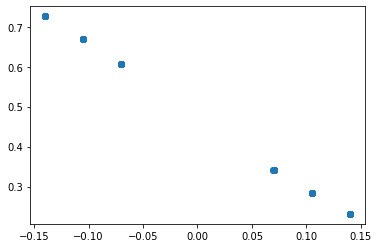

In [7]:
yfit = res.fittedvalues
plt.plot(df['probe_target'],yfit,'o');

You can now plot a more continuous curve for your fit by providing a linearly spaced list of x's in the range between -0.4 and 0.4. The fitted model can give you the predicted y's for those x's with the function *res.predict* in the results of your model. 

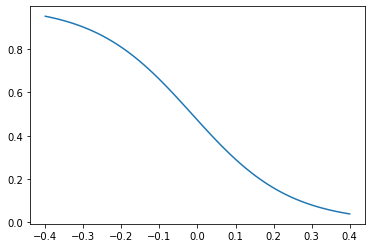

In [8]:
myx = np.linspace(-0.4,0.4,100)
yfit=res.predict(exog=dict(probe_target= myx )) #alternatively: yfit = res.predict(exog={'probe_target':myx})
plt.plot(myx,yfit,'-');

Now we plot the percent of responses for each possible distance between probe and target on top, to visualize how good our fit is. Does the model provide a good fit? 

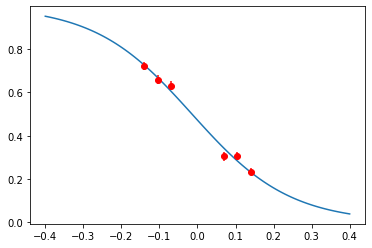

In [9]:
#as before (3 lines copied from cell above)
myx = np.linspace(-0.4,0.4,100)
yfit=res.predict(exog=dict(probe_target= myx )) #alternatively: yfit = res.predict(exog={'probe_target':myx})
plt.plot(myx,yfit,'-')

#now this adds the data points to check our fit
import scipy.stats as sp #we will need the standard error of the mean *sp.sem* from this module
Y=df['response'] #the responses of the experiment
X1=np.round(df['probe_target'],3) #the probe_target distances shown, round to 3 significant figures
nx = np.unique(X1) #the different probe_target distances shown
mn=[np.mean(Y[X1==x]) for x in nx] #mean of responses, for each different probe_target distance
sem=[sp.sem(Y[X1==x]) for x in nx] #sem of responses, for each different probe_target distance
plt.errorbar(nx,mn,yerr=sem, fmt="ro");



This graph shows that our logistic fit to the behavioral data is very good and has captured fairly well the behavior of our participants. From this analysis so far we conclude that...

In [10]:
 ??? 

Object `? ` not found.


### Exercise 2: attraction to non-target

Let us now include one further predictor, the distance between the target and the nearest non-target stimulus. This now goes in the direction of testing our hypothesis that non-target items kept in memory attract the memory of the target (as we tested in assignment 1).

Run again the generalized linear model and check if this additional predictor contributes significantly to the model description. How do you interpret this?


In [11]:
# we first define a new column in our dataframe, containing the distance between target and near non-target
df['dist_NT'] = circdist_rad(df.target , df.near )

# we now run the GLM with two predictors, probe_target and dist_NT
mod = smf.glm(formula= 'response ~ probe_target + dist_NT' , data=df,family=sm.families.Binomial())
res = mod.fit()

print(res.summary())
print("p-value for the probe_target predictor: p=" + str(res.pvalues[1]))
print("p-value for the dist_NT predictor: p=" + str(res.pvalues[2]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 3530
Model:                            GLM   Df Residuals:                     3527
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2158.7
Date:                Fri, 14 Feb 2020   Deviance:                       4317.3
Time:                        18:22:15   Pearson chi2:                 3.53e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1122      0.037     -3.057   

Including the factor of interest "distance from nearest non-target to target stimulus" did not improve our model much (look at the change in log-likelihood in relation to the previous model with only *probe_target*, the increase is only 0.1, and with the increase in parameters AIC increased, check *res.aic*), and the p-value for the coefficient of this factor is >>0.05, indicating that we cannot reject the null-hypothesis that this coefficient is zero. This is disappointing because the point of our experiment was to identify a biasing effect of simultaneous memories in reports in spatial working memory, but this model does not include all the detail about our experiment so we should go ahead and add all the other factors that intervened in our design.

In [12]:
res.aic

4323.321093872359

### Exercise 3: include delay predictor

We will now include one more predictor, the delay duration of each individual trial.  Run again the generalized linear model and check if this last factor contributes significantly to the model description. What is your interpretation?


In [13]:
# we include the predictor *delay* in the GLM
mod = smf.glm(formula= 'response ~ probe_target + dist_NT + delay' , data=df,family=sm.families.Binomial())
res = mod.fit()

print(res.summary())
print("p-value for the probe_target predictor: p=" + str(res.pvalues[1]))
print("p-value for the dist_NT predictor: p=" + str(res.pvalues[2]))
print("p-value for the delay predictor: p=" + str(res.pvalues[3]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 3530
Model:                            GLM   Df Residuals:                     3526
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2158.6
Date:                Fri, 14 Feb 2020   Deviance:                       4317.1
Time:                        18:22:15   Pearson chi2:                 3.53e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1315      0.055     -2.378   

Adding also the factor "delay", which was built into our design, again only increased marginally the likelihood of our model and did not do this with a coefficient for *'delay'* significantly different from 0. However, if we think carefully about our intentions with this experiment, the crucial point is an interaction of interest that we have not yet included in the model.

### Exercise 4: include the interaction!

Now notice that the hypothesis of our experiment was that there would be an attraction of behavioral responses toward near non-target memories, but specifically when there was a delay between cue and probe (i.e. this was a memory effect, as opposed to a perceptual effect). None of our analyses so far addressed this “specifically”, “only”, “here but not there” question. We need an interaction! Which one? Run again the generalized linear model and check if this interaction factor contributes significantly to the model description. What is your interpretation now? 

In [14]:
#include the interaction of interest
mod = smf.glm(formula= 'response ~ probe_target + dist_NT + delay + dist_NT*delay' , data=df,family=sm.families.Binomial())
res = mod.fit()


print(res.summary())
print("p-value for the probe_target factor: p=" + str(res.pvalues[1]))
print("p-value for the dist_NT factor: p=" + str(res.pvalues[2]))
print("p-value for the delay factor: p=" + str(res.pvalues[3]))
print("p-value for the interaction dist_NT*delay: p=" + str(res.pvalues[4]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 3530
Model:                            GLM   Df Residuals:                     3525
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2156.7
Date:                Fri, 14 Feb 2020   Deviance:                       4313.3
Time:                        18:22:15   Pearson chi2:                 3.53e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1299      0.055     -2.348

Now we obtain a marginally significant interaction! When we have interactions, main effects are not easily interpretable since we can have effects for one predictor that go in different directions when considering different levels of another predictor, and this could yield vanishing main effects.

Significant interactions can be analyzed by separating by one of the implicated predictors. Take separately trials with delay 0.1 (*perceptual trials*), and trials with delays 1 and 3 (*memory trials*), and now run the model without the interaction factor and without the delay factor (same model as in exercise 2) for each of these two sets of data. What do you see? 

Hint: Take special attention not only to the significance of the regressors, but also to the value of the fitted beta parameter (in particular, the sign). 


In [15]:
print('Short Delay')
bool_percept = df['delay']==0.1 #we build a boolean to select trials with delay 0.1 

# we run now the model for this subset of data, including only perceptual trials (and we remove the delay predictor)
mod = smf.glm(formula='response ~ probe_target + dist_NT', data= df[bool_percept] ,family=sm.families.Binomial())
res = mod.fit()


print(res.summary())
print("parameter for the dist_NT predictor: beta = " + str(res.params[2]))
print("p-value for the dist_NT predictor: p=" + str(res.pvalues[2]))


########

print('')
print('')
print('')

print('Long Delays')
bool_mem = df['delay']!=0.1 #we build a boolean to select trials with delay 1 or 3 

# we run now the model for this subset of data, including only memory trials (and we remove the delay predictor)
mod = smf.glm(formula='response ~ probe_target + dist_NT', data= df[bool_mem] ,family=sm.families.Binomial())
res = mod.fit()


print(res.summary())
print("parameter for the dist_NT predictor: beta = " + str(res.params[2]))
print("p-value for the dist_NT predictor: p=" + str(res.pvalues[2]))



Short Delay
                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 1176
Model:                            GLM   Df Residuals:                     1173
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.87
Date:                Fri, 14 Feb 2020   Deviance:                       1443.7
Time:                        18:22:15   Pearson chi2:                 1.18e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1540      0.063  

We observe now that when we split the data based on delay duration in 2 groups, we obtain that the model with non-target-to-target distance (dist_NT) now shows a marginally significant main effect for the *dist_NT* factor. This was previously non-significant in the full model. If we look closely, we will see that the value of the coefficient for *dist_NT* is now positive for short delays (0.0944)  and negative for long delays (-0.0697). This is indicating that the bias induced by non-targets may be different for each of these 2 conditions: repulsive for short delays, and attractive for long delays. This is the interaction that we found significant and this would explain that when we run the full model the main factor *dist_NT* has a vanishing coefficient because attractions and repulsions form the different delay conditions cancel one another.

We validate this intuition by plotting the data graphically in a way that will reveal our interpretation. This step is crucial to consolidate our interpretation.

In [16]:
df.head(16)

,response,probe,target,near,subj,load,delay,probe_target,dist_NT
0,0,0.31416,0.41888,0.17453,1.0,3.0,0.1,-0.10472,0.244350
1,0,5.42800,5.35820,5.16620,1.0,3.0,0.1,0.06980,0.192000
2,1,2.56560,2.63540,5.04400,1.0,3.0,0.1,-0.06980,-2.408600
3,0,5.82940,5.68980,0.55851,1.0,4.0,0.1,0.13960,-1.151895
4,0,1.34390,1.27410,1.04720,1.0,3.0,0.1,0.06980,0.226900
5,1,1.37880,1.48350,1.22170,1.0,3.0,0.1,-0.10470,0.261800
6,0,3.82230,3.71760,3.94440,1.0,4.0,0.1,0.10470,-0.226800
7,0,4.50290,4.36330,5.25340,1.0,4.0,0.1,0.13960,-0.890100
8,1,1.88500,1.78020,1.98970,1.0,4.0,0.1,0.10480,-0.209500
9,0,4.15390,4.04920,2.32130,1.0,3.0,0.1,0.10470,1.727900


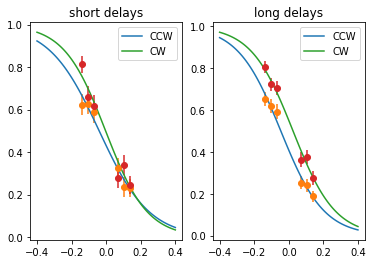

In [17]:
plt.subplot(1,2,1)
# we fit and plot first short delays for CCW trials
bool_sel = np.logical_and(df['delay']<0.5,df['dist_NT']>0)
mod = smf.glm(formula='response ~ probe_target', data=df[bool_sel],family=sm.families.Binomial())
res = mod.fit()

myx = np.linspace(-0.4,0.4,100)
yfit=res.predict(exog=dict(probe_target=myx)) #yfit = res.predict(exog={'probe_target':myx})
plt.plot(myx,yfit,'-', label="CCW")

#now this adds the data points to check our fit
Y=df['response'][bool_sel]
X1=np.round(df['probe_target'][bool_sel],3)
nx = np.unique(X1)
mn=[np.mean(Y[X1==x]) for x in nx]
sem=[sp.sem(Y[X1==x]) for x in nx]
plt.errorbar(nx,mn,yerr=sem, fmt="o")

# we fit and plot then short delays for CW trials (SAME AS ABOVE BUT FOR CW TRIALS)
bool_nsel = np.logical_and(df['delay']<0.5,df['dist_NT']<0)
mod = smf.glm(formula='response ~ probe_target', data= df[bool_nsel] ,family=sm.families.Binomial())
res = mod.fit()

myx = np.linspace(-0.4,0.4,100)
yfit=res.predict(exog={'probe_target':myx}) #yfit = res.predict(exog={'probe_target':myx})
plt.plot(myx,yfit,'-', label="CW")

Y=df['response'][bool_nsel]
X1=np.round(df['probe_target'][bool_nsel],3)
nx = np.unique(X1)
mn=[np.mean(Y[X1==x]) for x in nx]
sem=[sp.sem(Y[X1==x]) for x in nx]
plt.errorbar(nx,mn,yerr=sem, fmt="o")

plt.legend()
plt.title('short delays')

###################### new subplot
plt.subplot(1,2,2)

# we fit and plot long delays for CCW trials (SAME AS ABOVE BUT FOR MEM, CCW TRIALS)
bool_lccw = np.logical_and(df['delay']!=0.1,df['dist_NT']>0)
mod = smf.glm(formula='response ~ probe_target', data= df[bool_lccw] ,family=sm.families.Binomial())
res = mod.fit()

myx = np.linspace(-0.4,0.4,100)
yfit=res.predict(exog={'probe_target':myx}) #yfit = res.predict(exog={'probe_target':myx})
plt.plot(myx,yfit,'-', label="CCW")

Y=df['response'][bool_lccw]
X1=np.round(df['probe_target'][bool_lccw],3)
nx = np.unique(X1)
mn=[np.mean(Y[X1==x]) for x in nx]
sem=[sp.sem(Y[X1==x]) for x in nx]
plt.errorbar(nx,mn,yerr=sem, fmt="o")

# we fit and plot then long delays for CW trials (SAME AS ABOVE BUT FOR MEM, CW TRIALS)
bool_lcw = np.logical_and(df['delay']!=0.1,df['dist_NT']<0)
mod = smf.glm(formula='response ~ probe_target', data= df[bool_lcw] ,family=sm.families.Binomial())
res = mod.fit()

myx = np.linspace(-0.4,0.4,100)
yfit=res.predict(exog={'probe_target':myx}) #yfit = res.predict(exog={'probe_target':myx})
plt.plot(myx,yfit,'-', label="CW")

Y=df['response'][bool_lcw]
X1=np.round(df['probe_target'][bool_lcw],3)
nx = np.unique(X1)
mn=[np.mean(Y[X1==x]) for x in nx]
sem=[sp.sem(Y[X1==x]) for x in nx]
plt.errorbar(nx,mn,yerr=sem, fmt="o")

plt.legend()
plt.title('long delays');

### Exercise 5: participants

Remember from last session that we ran a regression analysis on the data collapsing together data from all subjects and we then went on to run a regression analysis incorporating subjects as factors. We now want to incorporate the subject factor into our analysis, but notice that now this factor is categorical, not parametric as all other factors previously. In a linear model, categorical predictors need special treatment. In the formulas for GLM we use *C(factor)* to specify that *factor* is categorical. 

Run the generalized linear model with *glm*. Does the fit improve? 

In [19]:
##Exercise 5
mod = smf.glm(formula= 'response ~ probe_target + dist_NT + delay + dist_NT*delay + C(subj)' , data=df,family=sm.families.Binomial())
res = mod.fit()

print(res.summary())
print("p-value for the probe_target factor: p=" + str(res.pvalues[8]))
print("p-value for the dist_NT factor: p=" + str(res.pvalues[9]))
print("p-value for the delay factor: p=" + str(res.pvalues[10]))
print("p-value for the interaction dist_NT*delay: p=" + str(res.pvalues[11]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 3530
Model:                            GLM   Df Residuals:                     3518
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2152.7
Date:                Fri, 14 Feb 2020   Deviance:                       4305.4
Time:                        18:23:27   Pearson chi2:                 3.53e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2860      0.112     -2.

Here, we treated participants as fixed effects of our design, and this is good to make inferences about our sample population. However, to make more general inferences on the larger population that our sample represents, we should treat the subject factor as a random effect. This would then correspond to a Generalized Linear Mixed Model (GLMM) (mixed reflects the fact that the model includes both fixed and random effects). GLMMs are advanced methods that are still not very well implemented in Python and people usually use R for this type of models. You can learn about this on your own, it is not part of the assignment, but you can play below to try to run such a model on this data (this is what was done in the orginal article by Almeida et al 2015).